# 546 (hybrid systems) hw2

You are welcome (and encouraged) to work with others, but each individual must submit their own writeup.

You are welcome to use analytical and numerical computational tools; if you do, include the **commented** sourcecode in your writeup (e.g. the .ipynb file).

You are welcome to consult research articles and other materials; if you do, include a full citation in your writeup (e.g. the .ipynb file) and upload a .pdf of the article to Canvas alongside your homework submission.

In [23]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

# simulating discrete systems

a. Write a simulation algorithm for discrete systems; use the following function signature:

In [13]:
def sim_discrete(R, a, K, j0):
    """
    numerical simulation for discrete system

    inputs:
    R : [0,K] x J x A -> J
    a : [0,K] x J -> A
      [0,K] - discrete times
      J - discrete states
      A - actions
    K   - int    - maximum discrete simulation time
    j0  - object - initial discrete state

    outputs:
    k - list - discrete times
    j - list - discrete states
    """
    k,j= [0],[j0]
    for s in range(1, K+1):
        k.append(s)
        j.append(R(s,j[-1],a))
    return k,j

b. Demonstrate that your simulation algorithm works correctly by applying it to an interesting example, explaining the expected behavior, and providing a visualization that demonstrates the expected behavior.

For both discrete and continous simulation, I will be using the following system as example (from hw1). 

Lets assume a robotic arm with a parallel jaws gripper has 3 degrees of freedom (3 rotational joints). In different object manipulation scenario, the system is described by difference $D$ and $F$. For example, when the robot is rotating a door knob, one or more joints can be contrained by the door knob. An other hand, if the gripper is holding an arbitrary object, joints will not be as contrained as the first example, but the weight of the object will still effect verticle oriented joints. Therefore, servoing this system is hybrid when the gripper different manipulation tasks.

We assume that $\theta_1$ represent the angle of base rotational joint which rotates along the z axis, $\theta_2$ represent a second joint that rotates along y axis, and $\theta_3$ rotate the gripper along x axis with respect to each of their own frame. link $l_1$ connects $\theta_1$ and $\theta_2$, $l_2$ connects $\theta_2$ and $\theta_3$, the gripper is mounted on the other side of $l_2$. Input $U = \{ (\tau_1, \tau_2, \tau_3)\}$ are the torques of joint 1, 2 and 3 for case 1 and 2. In case 3 $U = \{ \tau_3 \}$.

The following simulation will describe the discrete states transistions in this system:

1. The gripper is not holding anything.
2. The gripper is holding an object with weight m.
3. The gripper is holding a door knob, and try to rotate it. Assume the door knob responses a resistance torque $\tau_r$ to any rotation $\tau_{in}$, where $\tau_r = -k\tau_{in}$.

For case 2 we define the grasp point (location) of the object to be $p_1 = (4, 8, 3)$ and the door knob grasp point at $p_2 = (2, 3, 4)$. And then we define an function $K(\theta_1, \theta_2, \theta_3)$ to calculate the forward kinamatic then return the gripper end factor pose in Cartisian cordination.

$\{ \forall d \in D | K(d) = p_1 \}$ has a force transistion from case 1 to 2.

And $\{ \forall d \in D | K(d) = p_2 \}$ results a force transistion from case 1 to 3.

all the other $d \in D$ will indicate the system is in case 1.

In [17]:
# forward kinamatic function - to simplify this function (for the purpose of testing the sim_discrete),
# this function accept a system state then simulate a forward kinamatic output cx, cy, cz. The simulation
# is just randomly pick a point from 5 pre-defined points.
def K(x):
    i = randint(1,5)
    print ("i is: ", i)
    if i == 2:
        cx,cy,cz = 4,8,3
    elif i == 3:
        cx,cy,cz = 2,3,4
    elif i == 1:
        cx,cy,cz = 1,2,3
    elif i == 4:
        cx,cy,cz = 5,3,7
    else:
        cx,cy,cz = 47,36,7
    
    return cx,cy,cz

# a state machine function to simulate the 
def R(t, x, a):
    cx,cy,cz = K(x)
    j = 1 # default case 1 holding nothing
    if cx==4 and cy==8 and cz==3:
        j = 2
    elif cx==2 and cy==3 and cz==4:
        j = 3
        
    return j


# start simulation
a = 0 # no switch control in this case
j0 = 1 # initial condition gripper is holding nothing
iteration = 10
k,j = sim_discrete(R, a, iteration, j0);
print("state transistion: ")
print(j)

i is:  1
i is:  5
i is:  3
i is:  2
i is:  3
i is:  2
i is:  4
i is:  5
i is:  2
i is:  3
state transistion: 
[1, 1, 1, 3, 2, 3, 2, 1, 1, 2, 3]


The state transisiton above shows the output of simulation, i is the random generated points. Whenever $i = 2$ or $3$ the state simulation output should be $2$ or $3$. Note the the $i^{th}$ state should matches the $(i-1)^{th}$ value, since the the state variable included the initial state. And we can see the simulation works as expected.

# simulating continuous systems

a. Write a simulation algorithm for continuous systems; use the following function signature:

In [50]:
def sim_continuous(F, u, T, x0, dt):
    """
    numerical simulation for continuous system

    inputs:
    F : [0,T] x D x U -> D
    u : [0,T] x D -> U
      [0,T] - continuous times
      D - continuous states
      U - inputs
    T   - scalar - maximum continuous simulation time
    x0  - object - initial continuous state
    dt  - scalar - simulation timestep parameter

    outputs:
    t - list - discrete times
    x - list - discrete states
    """
    j,t,x = 0,[0],[x0]
    while j*dt < T:
        t.append((j+1)*dt)
        x.append(x[-1] + dt*F(j*dt, x[-1],u))
        j += 1
    
    return np.asarray(t),np.asarray(x)

b. Demonstrate that your simulation algorithm works correctly by applying it to an interesting example, explaining the expected behavior, and providing a visualization that demonstrates the expected behavior.

In this case, we will pick case 2 of the system above to simulate the continuous trajectory. In this case, we assume the robotic gripper is holding an object with 3kg weight, and the initial condition of the simulation is that $\theta_1 = 45^{\circ}, \theta_2 = 80^{\circ}, \theta_3 = 0^{\circ}, \dot{\theta_1} = 0, \dot{\theta_2} = 0, \dot{\theta_3} = 0$, with constant input $0, 0, 10$. Note that the robotic arm is assume to state in the previous state when without input. The simulation result matches my expectation, $\theta_2$ drops to zero because of the object gravitational forse, $ \dot{\theta_2}$ decrease as well. Because of the constant input signal, $\theta_3$ and $\dot{\theta_3}$ are increasing along time.

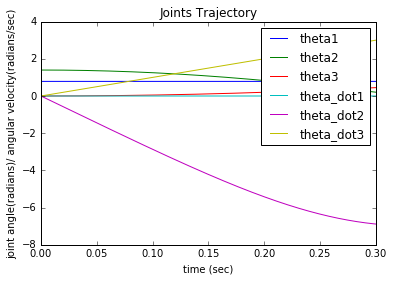

In [68]:
m = 3
g = 9.8
def F(t, x, u):
    a,b,c,ad,bd,cd = x
    t1,t2,t3 = u
    o1, o2, o3 = t1, t2-m*g*math.sin(b), t3
    # physical constrain
    #if b <= 0:
    #    print(bd, -bd)
    #    bd, o2, b = -bd, 0, 0
    return np.array([ad, bd, cd, o1, o2, o3])

# start simulation
u = [0,0,10]
T = 0.3 # approximately 2 periods
dt = 1e-4
x0 = np.array([math.radians(45), math.radians(80), math.radians(0), 0, 0, 0]) # initial condition
t_,x_ = sim_continuous(F, u, T, x0, dt)


plt.plot(t_,x_[:,0], label='theta1')
plt.plot(t_,x_[:,1], label='theta2')
plt.plot(t_,x_[:,2], label='theta3')
plt.plot(t_,x_[:,3], label='theta_dot1')
plt.plot(t_,x_[:,4], label='theta_dot2')
plt.plot(t_,x_[:,5], label='theta_dot3')
plt.legend()
plt.title('Joints Trajectory')
plt.xlabel('time (sec)')
plt.ylabel('joint angle(radians)/ angular velocity(radians/sec)')
plt.show(block=True)

Different initial condition just for fun (work as expected as well, simulation function is correct). This simulation has a constant input on $\theta_2$ such that the arm is not falling because of the object, but even slightly rising.

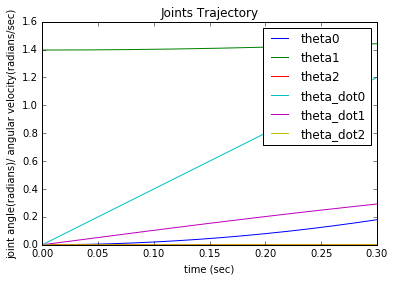

In [67]:
# start simulation
u = [4,30,0]
T = 0.3 # approximately 2 periods
dt = 1e-4
x0 = np.array([math.radians(0), math.radians(80), math.radians(0), 0, 0, 0]) # initial condition
t_,x_ = sim_continuous(F, u, T, x0, dt)



plt.plot(t_,x_[:,0], label='theta0')
plt.plot(t_,x_[:,1], label='theta1')
plt.plot(t_,x_[:,2], label='theta2')
plt.plot(t_,x_[:,3], label='theta_dot0')
plt.plot(t_,x_[:,4], label='theta_dot1')
plt.plot(t_,x_[:,5], label='theta_dot2')
plt.legend()
plt.title('Joints Trajectory')
plt.xlabel('time (sec)')
plt.ylabel('joint angle(radians)/ angular velocity(radians/sec)')
plt.show(block=True)